## Exercise 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
# use seaborn plotting defaults
import seaborn as sns; sns.set()

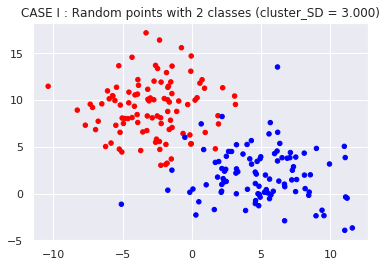

In [2]:
from sklearn.datasets.samples_generator import make_blobs


std = 3

X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std = std, random_state=42)

#X, y = make_blobs(n_samples=500, centers=[[0,0],[5,5]], random_state=0, cluster_std = std)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# Plotting the cluster in different colors for easy visualization
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, cmap=cmap_bold);
plt.title("CASE I : Random points with 2 classes (cluster_SD = %.3f)"%std);

In [3]:
from sklearn.model_selection import train_test_split

# Splitting 33 percent (approx. 1/3) data for test and remaining 67 (approx. 2/3) for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Showing only the training points in plot:


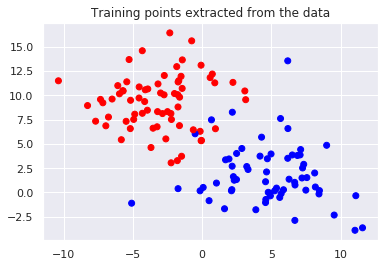

In [4]:
# Plot also the training points

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.title("Training points extracted from the data")
plt.show()

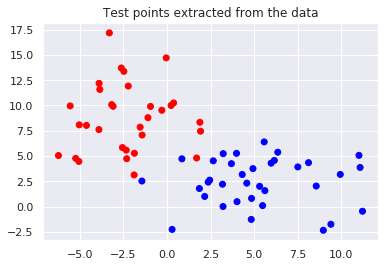

In [5]:
# Plot also the test points

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
plt.title("Test points extracted from the data")
plt.show()

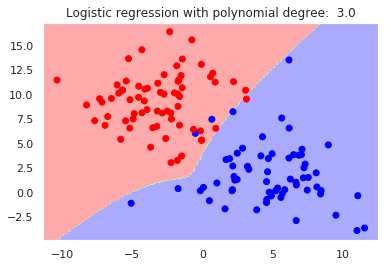

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Logistic regression 
deg = 3
model = make_pipeline(PolynomialFeatures(deg),LogisticRegression(solver='liblinear',C = 0.01))
clf = model.fit(X_train, y_train)

# create a mesh to plot in
h = .1  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.title("Decision surface of LogisticRegression")
plt.axis('tight')

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression with polynomial degree:  %.1f" %deg)

plt.show()

In [7]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))


# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.978
prediction accuracy (test score): 0.955 


### Increasing the degree of polynomial to two

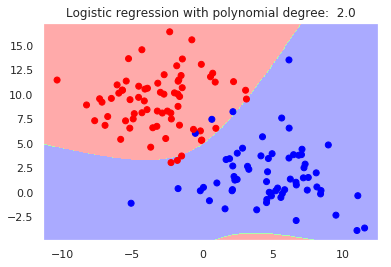

In [8]:
# Logistic regression with polynomial of degree 2
deg = 2
model = make_pipeline(PolynomialFeatures(deg),LogisticRegression(solver='lbfgs',C = 0.01))
clf = model.fit(X_train, y_train)

# create a mesh to plot in
h = .1  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.title("Decision surface of LogisticRegression")
plt.axis('tight')

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression with polynomial degree:  %.1f" %deg)

plt.show()

In [9]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))


# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.955
prediction accuracy (test score): 0.970 


### Increasing the degree of polynomial to three

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


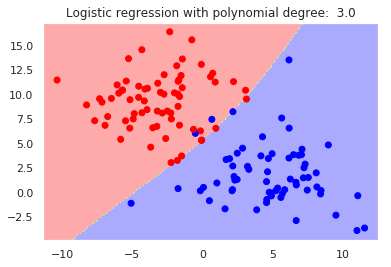

In [10]:
# Logistic regression with polynomial of degree 3
deg = 3
model = make_pipeline(PolynomialFeatures(deg),LogisticRegression(solver='lbfgs',C = 0.01)) # C is inverse of 
# regularization strength. Smaller values mean strong regularization
clf = model.fit(X_train, y_train)

# create a mesh to plot in
h = .1  # step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.title("Decision surface of LogisticRegression")
plt.axis('tight')

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression with polynomial degree:  %.1f" %deg)

plt.show()

In [11]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))


# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.970
prediction accuracy (test score): 0.970 


### Varying the degrees of the polynomial to check for overfitting

In [26]:
d= {}

for deg in range(1, 10, 1): # Varying the polynomial degree from 1 to 10 in step size of 1
    l =[]
    # Create an instance of classifier
    model = make_pipeline(PolynomialFeatures(deg),LogisticRegression(solver='liblinear',C = 0.01)) # C is inverse of 
    # regularization strength. Smaller values mean strong regularization
    clf = model.fit(X_train, y_train)
    
    # Fit the generated data to the model 
    clf.fit(X_train, y_train)

    # Get the training scores
    l.append("%.3f"%clf.score(X_train, y_train))
    
    # Get the prediction result (for test data)
    Z = clf.predict(X_test)

    # Get the test accurracy
    l.append("%.3f"%accuracy_score(y_test, Z))
    d[deg] = l

# Printing out as a table format
print ("{:<8} {:<15} {:<10}".format('Polynomial-degree','Training score','Test score'))
for key, val in sorted(d.items()):
    label, num = val
    print ("{:<18} {:<15} {:<10}".format(key, label, num))


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: Futur

Polynomial-degree Training score  Test score
1                  0.690           0.620     
2                  0.960           0.920     
3                  0.990           0.960     
4                  1.000           0.980     
5                  1.000           0.980     
6                  1.000           0.980     
7                  1.000           0.980     
8                  1.000           0.980     
9                  1.000           0.980     


/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Exercise 4

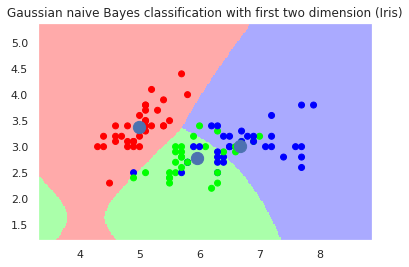

In [27]:
from sklearn.naive_bayes import GaussianNB

# import data from IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features of the 4-D dataset 
y = iris.target

# Splitting 33 percent (approx. 1/3) data for test and remaining 67 (approx. 2/3) for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


# create an instance of Gaussian Naive Bayes Classifier and fit the data.
clf = GaussianNB()
clf.fit(X_train, y_train)
# GaussianNB(priors = None) # class priors are adapted from the data

# centers of the Gaussians:
centers = clf.theta_

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.scatter(centers[:,0],centers[:,1],s=150)  # gaussian centers as big blobs
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian naive Bayes classification with first two dimension (Iris)")
plt.show()



In [28]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))

# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.790
prediction accuracy (test score): 0.780 


#### Now, comparing it with the k-NN classifier, we see that:

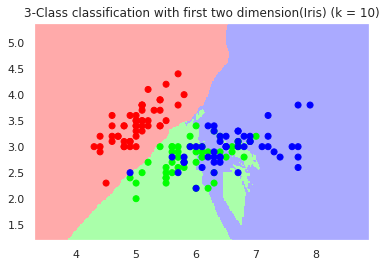

In [29]:
n_neighbors = 10

h = .02  # step size in the mesh

# create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification with first two dimension(Iris) (k = %i)" % n_neighbors)
plt.show()

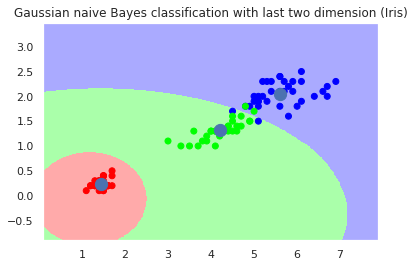

In [41]:
# import data from IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features of the 4-D dataset 
y = iris.target

# Splitting 33 percent (approx. 1/3) data for test and remaining 67 (approx. 2/3) for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


# create an instance of Gaussian Naive Bayes Classifier and fit the data.
clf = GaussianNB()
clf.fit(X_train, y_train)
# GaussianNB(priors = None) # class priors are adapted from the data

# centers of the Gaussians:
centers = clf.theta_

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.scatter(centers[:,0],centers[:,1],s=150)  # gaussian centers as big blobs
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Gaussian naive Bayes classification with last two dimension (Iris)")
plt.show()

In [31]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))

# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.960
prediction accuracy (test score): 0.960 


#### Again, comparing it with the k-NN classifier, we see that:

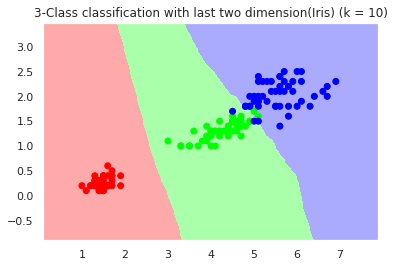

In [32]:
n_neighbors = 10

h = .02  # step size in the mesh

# create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification with last two dimension(Iris) (k = %i)" % n_neighbors)
plt.show()

In [33]:
# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))

# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.960
prediction accuracy (test score): 0.960 


### Using all four dimensions of the Iris dataset (splitting the dataset 2/3 training and 1/3 testing)

In [34]:
# import data from IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :]  # we take all four features of the 4-D dataset 
y = iris.target

# Splitting 33 percent (approx. 1/3) data for test and remaining 67 (approx. 2/3) for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) 


# create an instance of Gaussian Naive Bayes Classifier and fit the data.
clf = GaussianNB()
clf.fit(X_train, y_train)
# GaussianNB(priors = None) # class priors are adapted from the data

# print the training scores
print("training score : %.3f" % (clf.score(X_train, y_train)))

# Get the prediction result (for test data)
Z = clf.predict(X_test)

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))

training score : 0.960
prediction accuracy (test score): 0.960 


### Comparing the result to k-NN neighbour

In [35]:
n_neighbors = 10 # Number of neighbors for kNN

# Create an instance of neighbors class imported from sklearn
classifier = neighbors.KNeighborsClassifier(n_neighbors)

# Fit the generated data to the model 
classifier.fit(X_train, y_train)


# Get the prediction result (for test data)
Z = classifier.predict(X_test)

# print the training scores
print("training score : %.3f" % (classifier.score(X_train, y_train)))

# print the test score
print("prediction accuracy (test score): %.3f " % accuracy_score(Z, y_test))


training score : 0.980
prediction accuracy (test score): 0.980 


### Exercise 2

In [36]:
%matplotlib inline
import scipy, scipy.stats
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap



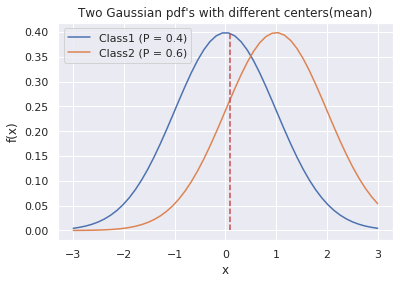

In [37]:
# Probabilities of two distributions (classes)
Py_1 = 0.4
Py_2 = 0.6

x = scipy.linspace(-3,3,50)
# Generating first gaussian distribution with center =0 and SD = 1
mu_1 = 0.0
sigma2_1 = 1.0
pdf_1 = scipy.stats.norm.pdf(x,mu_1,sigma2_1)

# Generating second gaussian distribution with center =1 and SD = 1
mu_2 = 1.0
sigma2_2 = 1.0
pdf_2 = scipy.stats.norm.pdf(x,mu_2,sigma2_2)

# Plotting the two pdf's
plt.plot(x,pdf_1)
plt.plot(x,pdf_2)
plt.title("Two Gaussian pdf's with different centers(mean)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Class1 (P = 0.4)', 'Class2 (P = 0.6)'], loc='upper left') 


#x1 = x2 = (mu_1+mu_2)/2.0    #x1 is the decision boundary if probabilities of both distribution are equal

x1 = x2 = ((mu_1 + mu_2)/2.0)+ (((sigma2_1) ** 2)/(mu_1 - mu_2))*math.log(Py_2/Py_1)

y1 = min(min(pdf_1),min(pdf_2))
y2 = max(max(pdf_1),max(pdf_2))

plt.plot((x1, x2), (y1, y2), 'r--')

plt.show()

In [38]:
def opt_classifier(X):
    pdf_1 = scipy.stats.norm.pdf(x,mu_1,sigma2_1)
    pdf_2 = scipy.stats.norm.pdf(x,mu_2,sigma2_2)
    
    if X < ((mu_1 + mu_2)/2.0)+ (((sigma2_1) ** 2)/(mu_1 - mu_2))*math.log(Py_2/Py_1):
        return 0
    else:
        return 1

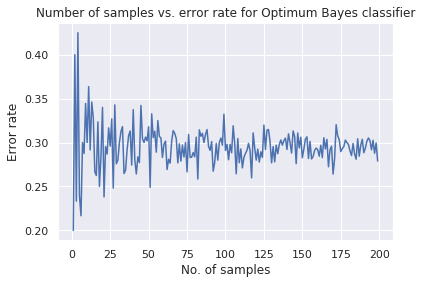

In [39]:
# Performing monte carlo sampling, and calculating error rate
n_samples =[]
error_vals =[]
for N in range(1,200): # Number of samples ranging from 1 to 100
    n_samples.append(N)
    # Sampled according to percent, i.e. 40/60
    X = np.concatenate((np.random.normal(0, 1, [4*N]),np.random.normal(1, 1, [6*N])))
    y = np.concatenate((np.zeros((1, 4*N)),np.ones((1, 6*N))),axis=1)
    y = y[0]
    false_val =[]
    for i in range(0,10*N):
        val = opt_classifier(X[i])
        if val != y[i]:
            false_val.append(val)

    error_rate = len(false_val)/(10.0*N)
    
    error_vals.append(error_rate)

plt.plot(n_samples,error_vals)
plt.title("Number of samples vs. error rate for Optimum Bayes classifier")
plt.xlabel('No. of samples')
plt.ylabel('Error rate')

plt.show()